[('15025', 1881), ('15026', 12), ('15144', 1310), ('152206246', 25)]
[('15025', 56), ('15026', 8), ('15144', 58), ('152206246', 2)]


avg release amt.  3550.763513332444


{1987.0: 742, 1988.0: 678, 1989.0: 924, 1990.0: 965, 1991.0: 557, 1992.0: 497, 1993.0: 504, 1994.0: 458, 1995.0: 481, 1996.0: 457, 1997.0: 444, 1998.0: 461, 1999.0: 410, 2000.0: 426, 2001.0: 429, 2002.0: 414, 2003.0: 411, 2004.0: 399, 2005.0: 389, 2006.0: 366, 2007.0: 365, 2008.0: 374, 2009.0: 336, 2010.0: 346, 2011.0: 358, 2012.0: 358, 2013.0: 376, 2014.0: 374, 2015.0: 367, 2016.0: 345, 2017.0: 307, 2018.0: 311, 2019.0: 297}


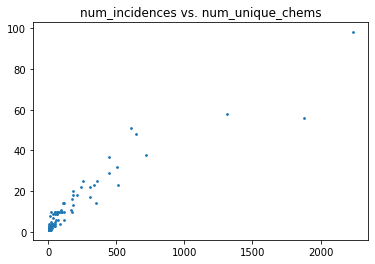

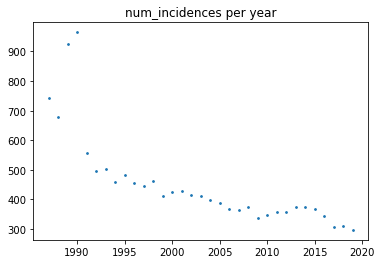

In [8]:
from csv import reader
import copy
import matplotlib.pyplot as plot

def opn_csv(x):
    with open(x, 'r') as f:
        a = reader(f)
        b = list(a)
        return b
    
def cd(x): #column dictionary from column names
    a = x[0]
    b = []
    for i in range(len(x[0])):
        c = []
        for j in range(1, len(x)):
            c.append(x[j][i])
        b.append(c)
    return dict(zip(a,b))

def ky(x, y): #key operator, groups y according to unique values of x
    a = list(set(x))
    b = []
    for i in range(len(a)):
        c = []
        for j in range(len(x)):
            if a[i] == x[j]:
                c.append(y[j])
        b.append(c)
    return dict(zip(a, b))

def mp(x, y): #map function over dictionary values
    a = copy.deepcopy(x)
    for i in a:
        a[i] = y(a[i])
    return a

def nu(x): #number unique items
    return len(set(x))

def inn(x):
    a = ['.','0','1','2','3','4','5','6','7','8','9']
    b = True
    for i in range(len(x)):
            b = b and (x[i] in a)
    return b

def tf(x):
    for i in range(len(x)):
        if inn(x[i]):
            x[i] = float(x[i])
        else:
            x[i] = 0.0
    return x

def main():
    a = cd(opn_csv('tri_water.csv'))
    
    ky_zip_chem = ky(a['ZIP_CODE'], a['CHEM_NAME'])
    
    num_incidences = mp(ky_zip_chem, len)
    num_unique_chems = mp(ky_zip_chem, nu)
    
    print(list(num_incidences.items())[:4])
    print(list(num_unique_chems.items())[:4])
    print('\n')
    
    plot.figure(1)
    plot.scatter(num_incidences.values(), num_unique_chems.values(), s = 3)
    plot.title('num_incidences vs. num_unique_chems')
    
    tf(a['REPORTING_YEAR'])
    num_incidences_yr = mp(ky(a['REPORTING_YEAR'], a['REPORTING_YEAR']), len)
    
    plot.figure(2)
    plot.scatter(num_incidences_yr.keys(), num_incidences_yr.values(), s = 3)
    plot.title('num_incidences per year')
    
    print('avg release amt. ', sum(tf(a['REL_EST_AMT'])) / len(a['REL_EST_AMT']))
    print('\n')
    
    print(num_incidences_yr)
    
    
if __name__ == "__main__":
    main()
    